In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data_dir = "data"
datasets = ["FD001", "FD002", "FD003", "FD004"]

columns = [
    "unit number",
    "time, in cycles",
    "operational setting 1",
    "operational setting 2",
    "operational setting 3",
    *(f"sensor measurement {i}" for i in range(1, 22)),
]

train_sets = {}
for ds in datasets:
    path = os.path.join(data_dir, f"train_{ds}.txt")
    train_sets[ds] = pd.read_csv(path, sep="\s+", header=None, names=columns)

train_sets["FD001"].head()

,unit number,"time, in cycles",operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


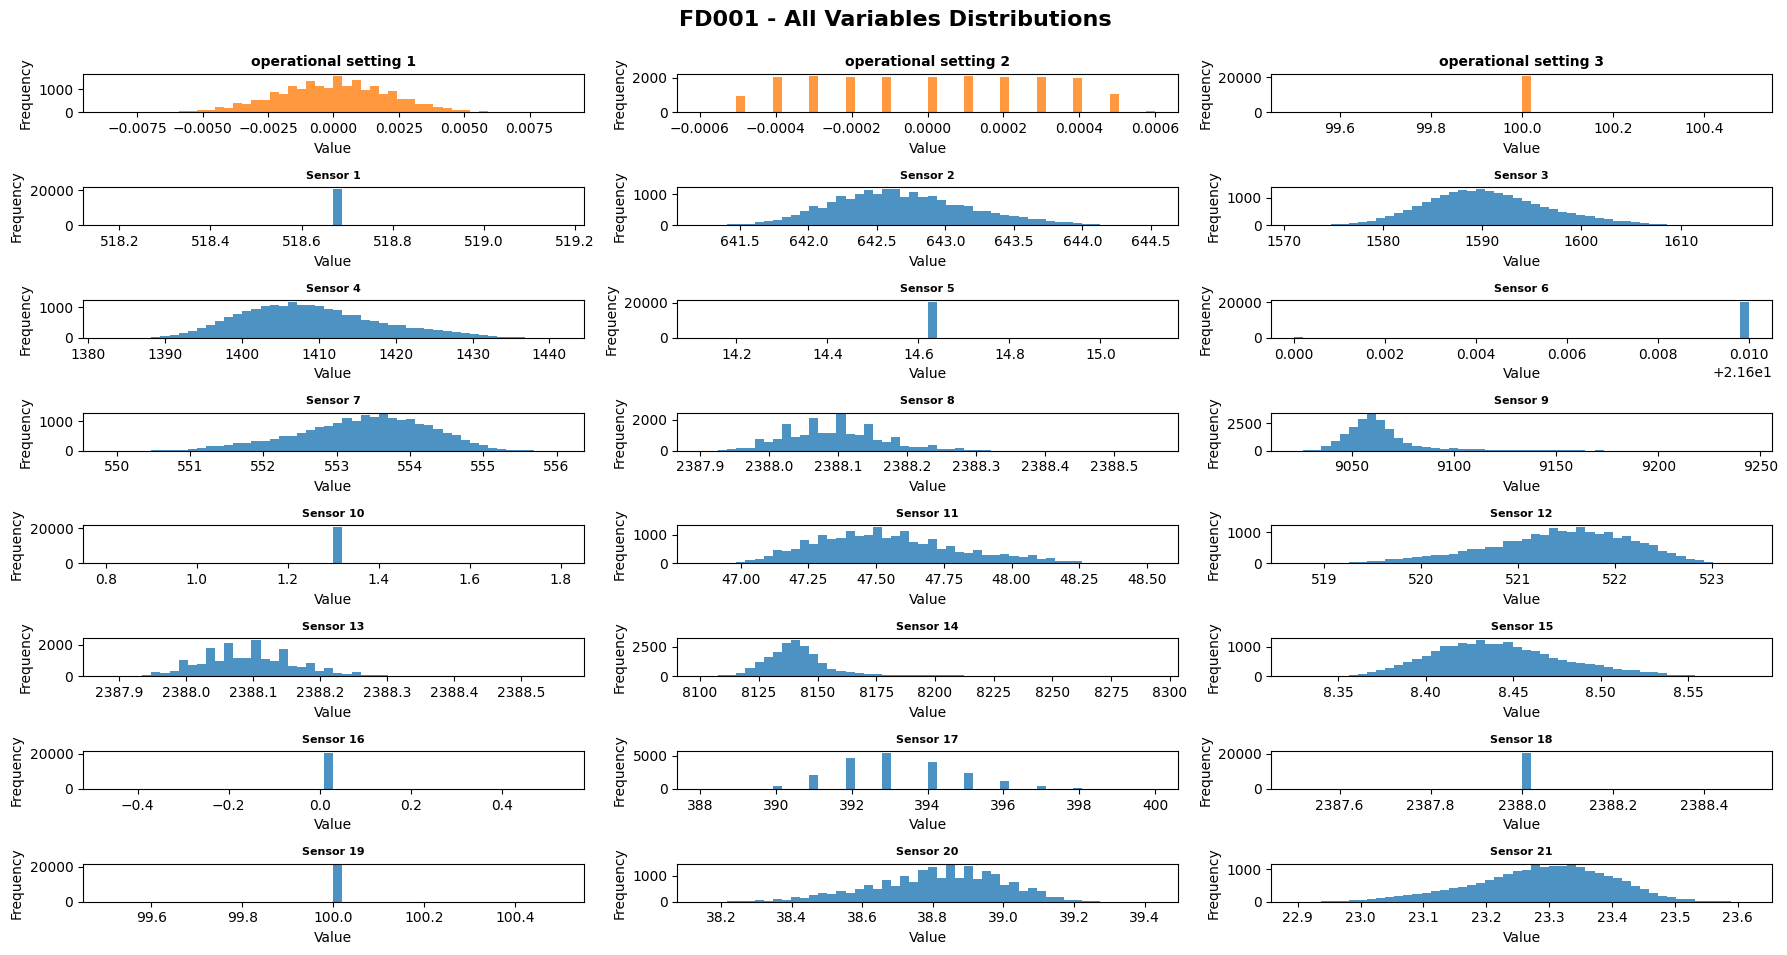

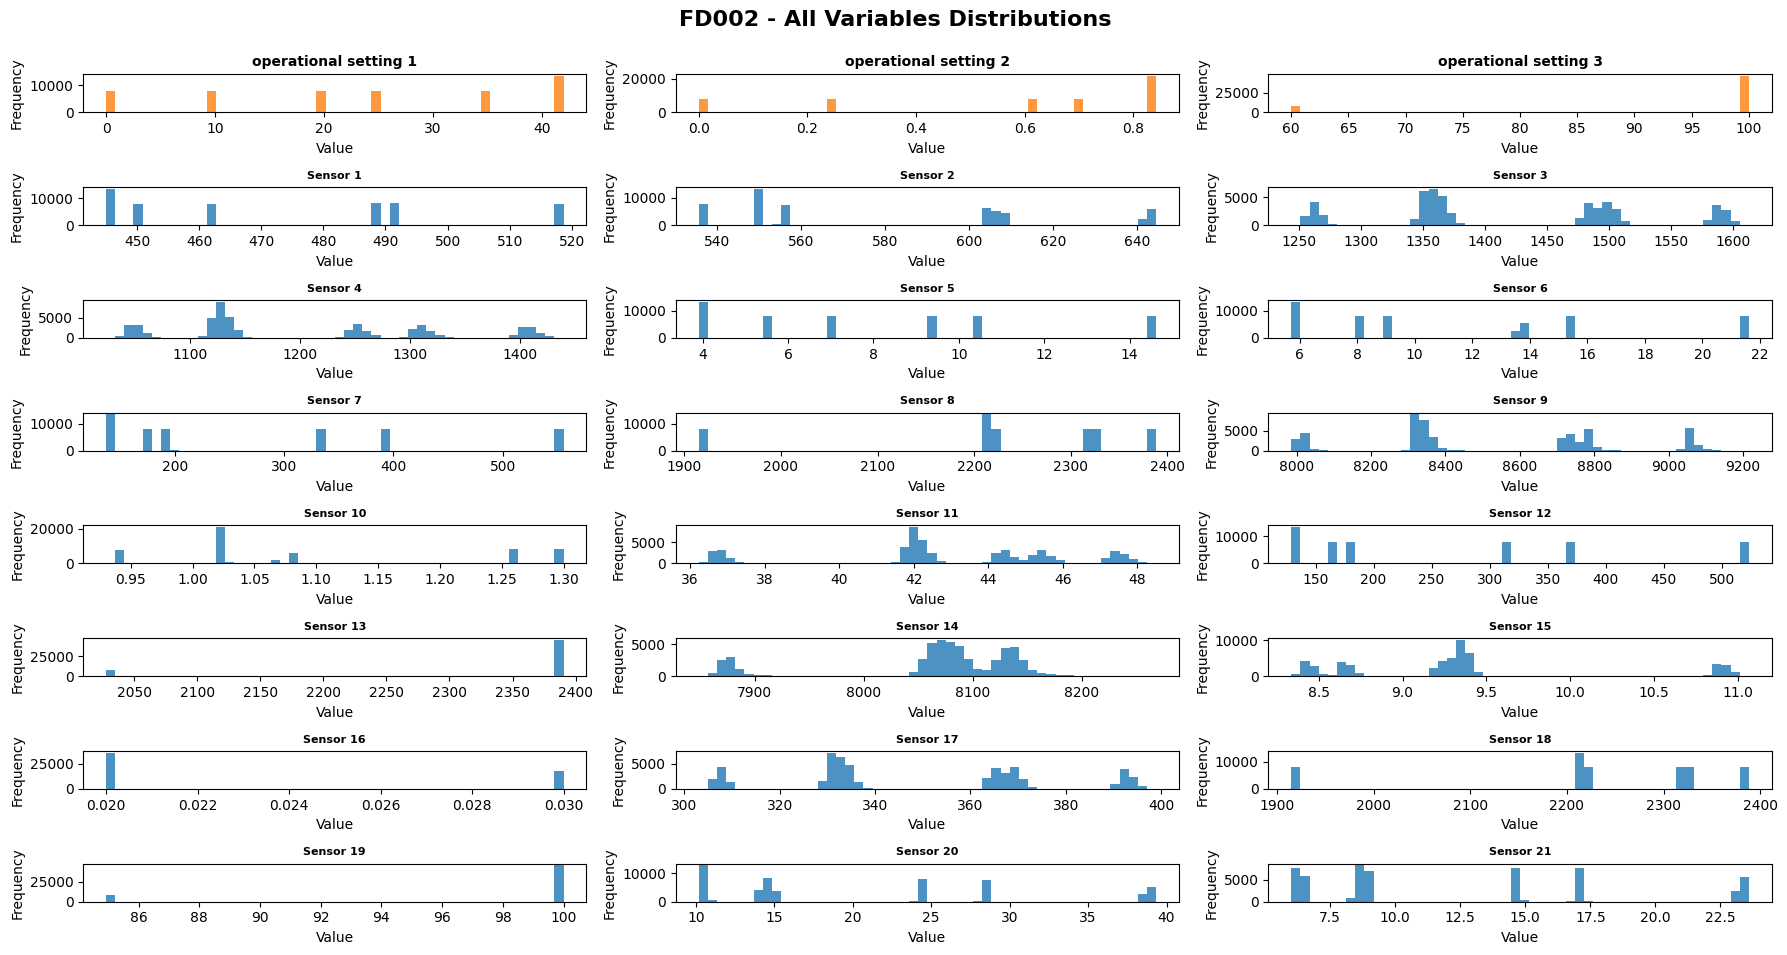

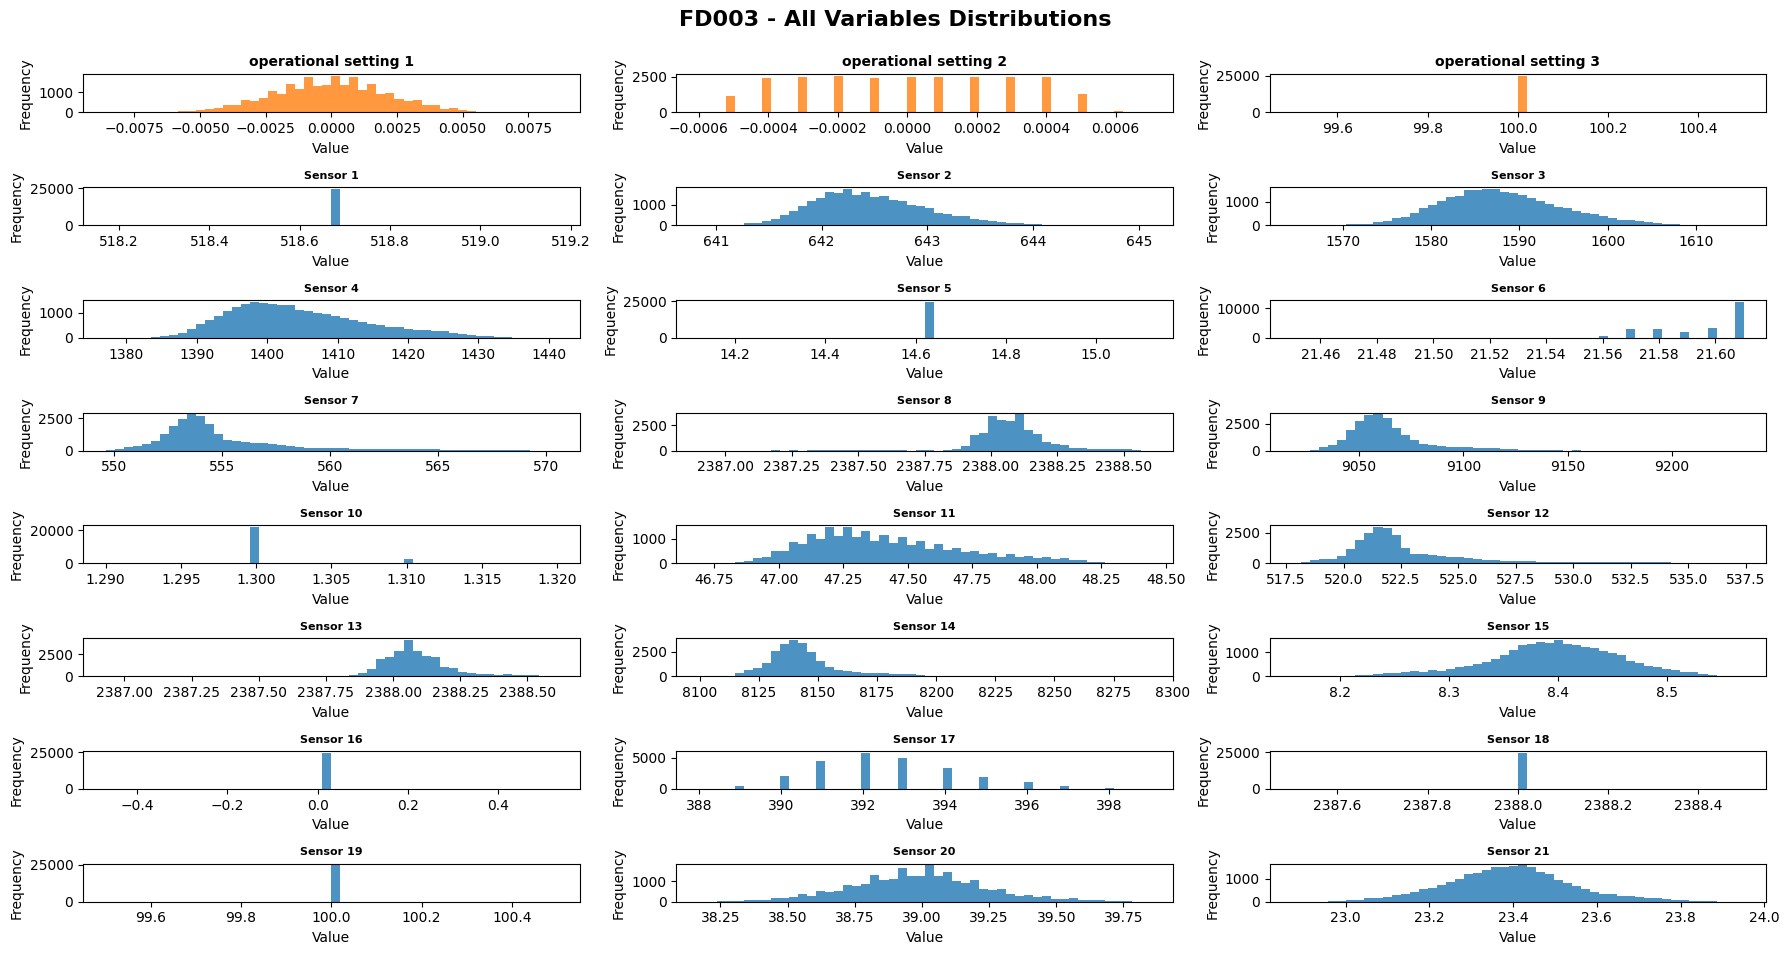

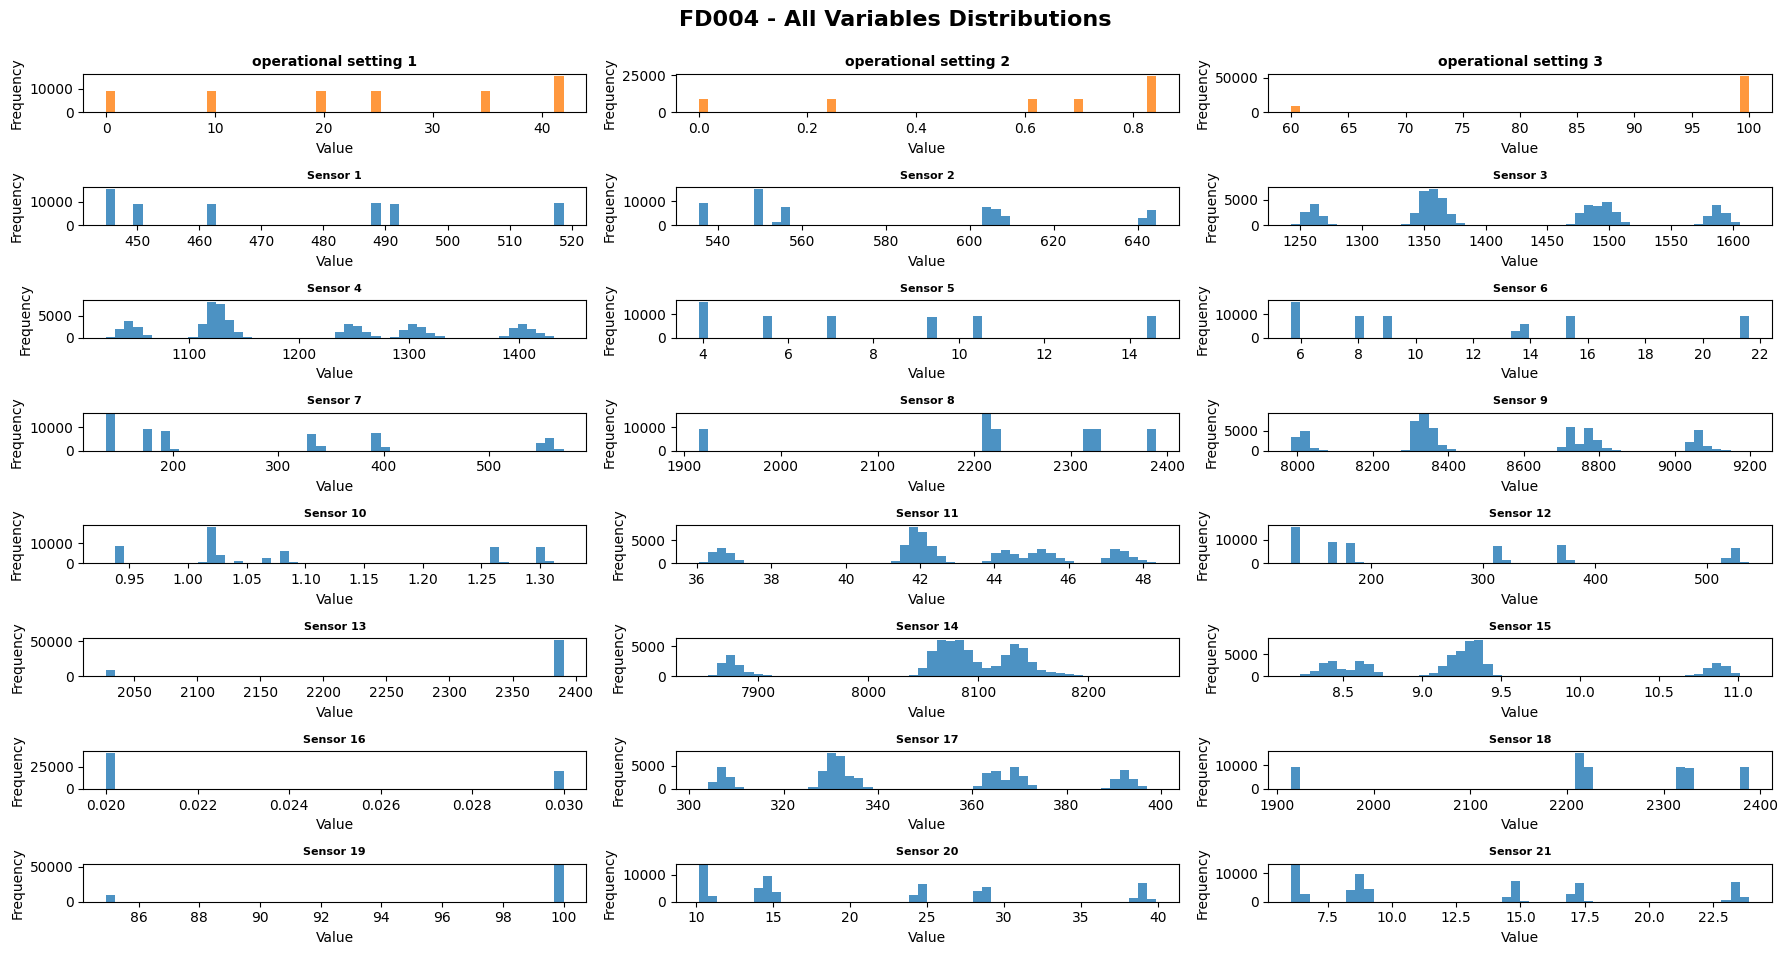

In [7]:
def plot_all_variables(df, title):
    op_cols = [c for c in df.columns if c.startswith("operational setting")]
    sensor_cols = [c for c in df.columns if c.startswith("sensor measurement")]

    n_op = len(op_cols)
    n_sensors = len(sensor_cols)
    total_rows = 1 + ((n_sensors + 2) // 3)
    fig, axes = plt.subplots(total_rows, 3, figsize=(18, 10))
    axes = axes.flatten()

    for i, col in enumerate(op_cols):
        axes[i].hist(df[col].dropna(), bins=50, color="#ff7f0e", alpha=0.8)
        axes[i].set_title(col, fontsize=10, fontweight="bold")
        axes[i].set_xlabel("Value")
        axes[i].set_ylabel("Frequency")

    for i, col in enumerate(sensor_cols):
        ax = axes[n_op + i]
        ax.hist(df[col].dropna(), bins=50, color="#1f77b4", alpha=0.8)
        ax.set_title(col.replace("sensor measurement ", "Sensor "), fontsize=8, fontweight="bold")
        ax.set_xlabel("Value")
        ax.set_ylabel("Frequency")

    for j in range(n_op + n_sensors, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.suptitle(f"{title} - All Variables Distributions", fontsize=16, fontweight="bold")
    plt.show()

for ds, df in train_sets.items():
    plot_all_variables(df, ds)


In [8]:
for ds, df in train_sets.items():
    is_time_series = (
        df.groupby("unit number")["time, in cycles"]
        .apply(lambda x: x.is_monotonic_increasing)
        .all()
    )
    print(f"{ds}: {'Time series' if is_time_series else 'Not time series'}")

FD001: Time series
FD002: Time series
FD003: Time series
FD004: Time series
